In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
pd.set_option("display.max_columns",100)

In [3]:
df=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\Google_Play\googleplaystore.csv")
df2=pd.read_csv(r"C:\Users\berid\OneDrive\Desktop\mydata\Google_Play\googleplaystore_user_reviews.csv")


In [5]:
df.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [6]:
df2.head(5)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


# Plot number of apps by category 

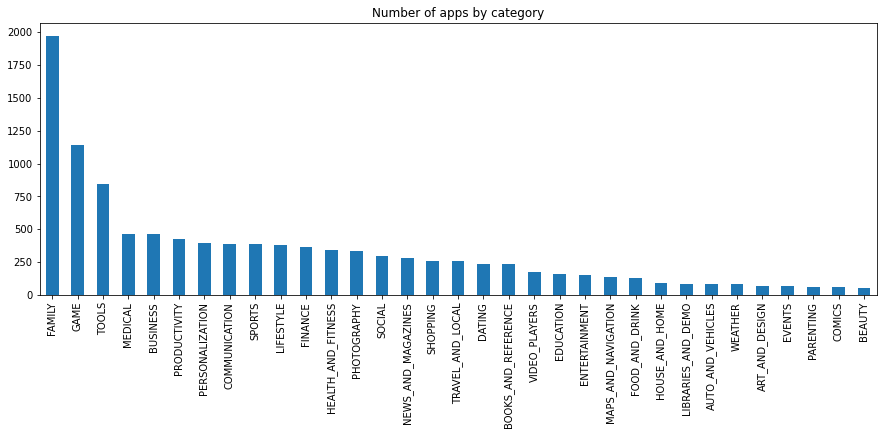

In [23]:
grouped=df["Category"].value_counts().reset_index()[:-1]

grouped.plot(kind="bar",figsize=(15,5),x="index",y="Category",xlabel="",legend=False)
plt.title("Number of apps by category")
plt.show()

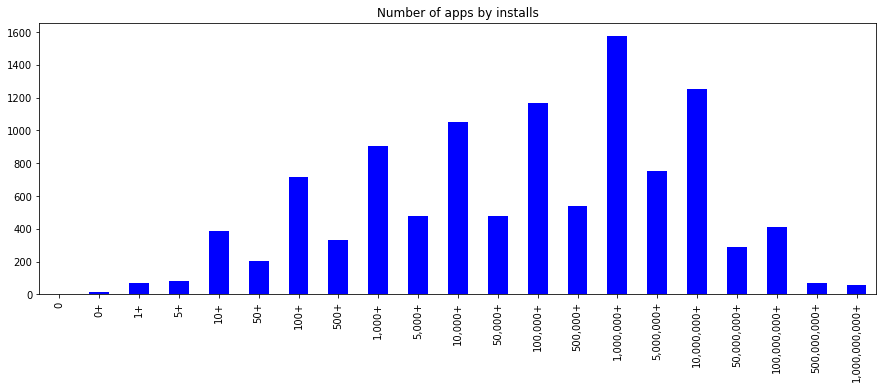

In [24]:
grouped=df["Installs"].value_counts().reset_index()
grouped["len"]=grouped["index"].apply(lambda x:len(x))
grouped=grouped.loc[grouped["index"]!="Free"]
grouped=grouped.sort_values(["len","index"])


grouped.plot(kind="bar",figsize=(15,5),x="index",y="Installs",xlabel="",legend=False,color="b")
plt.title("Number of apps by installs")
plt.show()

# Find the share of Free and Paid apps 

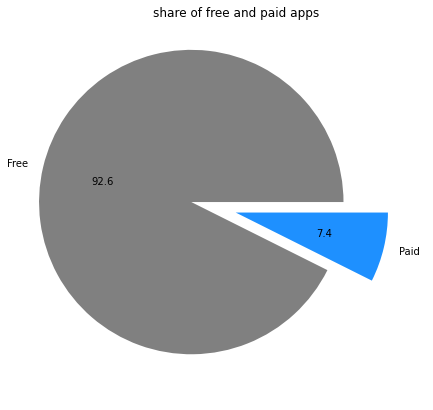

In [25]:
grouped=df["Type"].value_counts().reset_index()[:-1]

plt.figure(figsize=(7,7))
plt.pie(grouped.Type,labels=grouped["index"],autopct="%1.1f",explode=[0.3,0],colors=["grey","dodgerblue"])
plt.title("share of free and paid apps")
plt.show()

# Find distribution of apps by rating 

In [26]:
df.loc[10472,"Last Updated"]="February 11, 2018"

df["Last Updated"]=pd.to_datetime(df["Last Updated"])

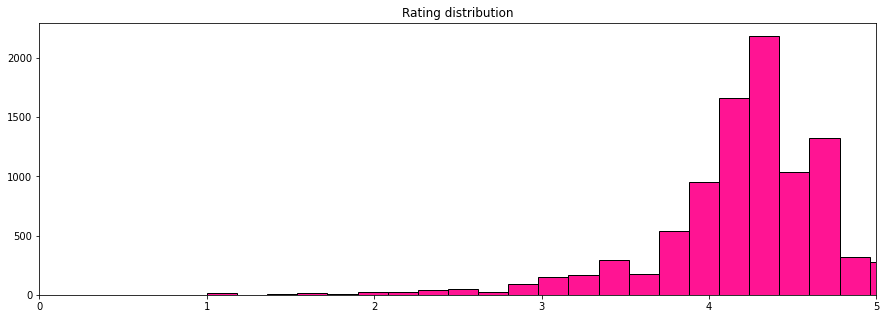

In [198]:
plt.figure(figsize=(15,5))
bins=plt.hist(df.Rating,bins=100,ec="k",color="deeppink")
plt.xlim(0,5)
plt.title("Rating distribution")
plt.show()

# Find average Rating for each category 

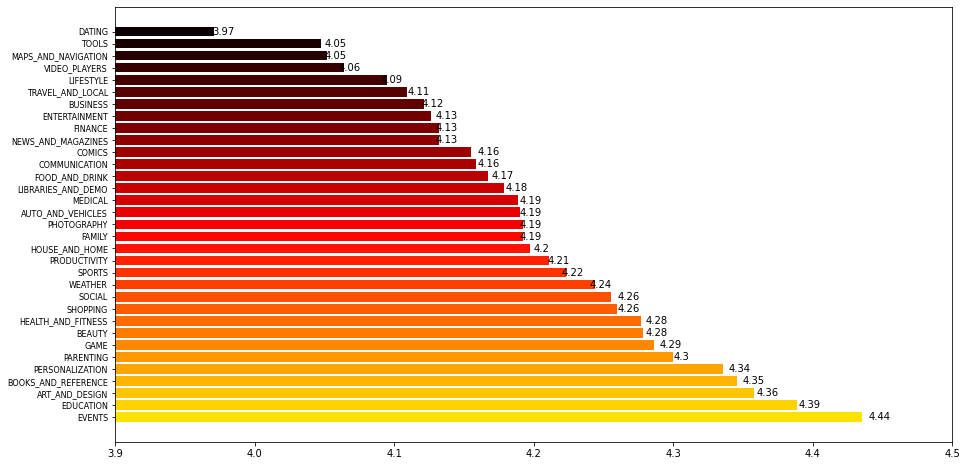

In [51]:
grouped=df.groupby("Category")["Rating"].mean().reset_index().sort_values("Rating",ascending=False)[1:]

colors=reversed(list(plt.get_cmap("hot")(np.linspace(0,0.7,grouped.Category.nunique()))))
plt.figure(figsize=(15,8))
plt.barh(grouped.Category,grouped.Rating,color=[c for c in colors])
plt.yticks(size=8)
plt.xlim(3.9,4.5)

def value_labels(y):
    for i in range(len(y)):
        plt.text(round(y.iloc[i],2),i,round(y.iloc[i],2),va="center")  
value_labels(grouped.Rating)

plt.show()

#  How many percent of total apps are supported by only Android Ver. 8 and above?

In [29]:
df=df.assign(AndVer=df["Android Ver"].astype(str).apply(lambda x:x.split(".")[0]))
df[df.AndVer=="8"].shape[0]/df.shape[0]*100
#df.drop(columns="AdVer",inplace=True)

0.05534544783691542

# Are Rating and Sentiment_Polarity correlated 

In [186]:
grouped2=df2.groupby("App").agg({"Sentiment_Polarity":["count","mean"]})["Sentiment_Polarity"].reset_index()
grouped1=df.groupby("App")["Rating"].mean().reset_index()

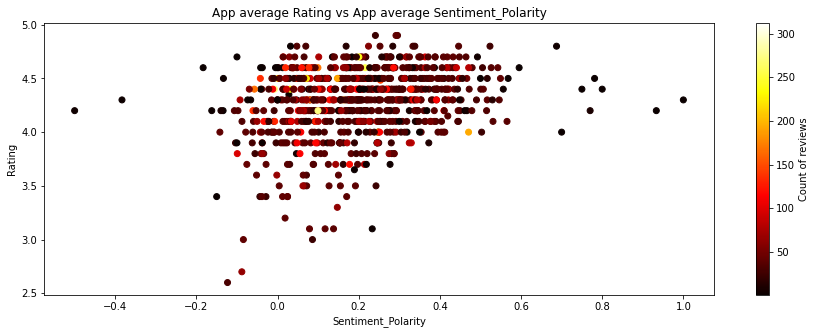

Correlation coefficient is:  0.27


In [189]:
grouped=grouped1.merge(grouped2,on="App")
grouped=grouped[~grouped.isnull().any(axis=1)]  # select only those rows from this dataframe which do not contain any NaN value in any of the column

plt.figure(figsize=(15,5))
plt.scatter(grouped["mean"],grouped.Rating,c=grouped["count"],cmap="hot")
plt.colorbar().set_label("Count of reviews")
plt.title("App average Rating vs App average Sentiment_Polarity")
plt.ylabel("Rating")
plt.xlabel("Sentiment_Polarity")
plt.show()

print("Correlation coefficient is: ",round(grouped["mean"].corr(grouped.Rating),2))